In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.PlotDriver import CPlotDriver


In [2]:
code = "NVDA"
begin_time = "2025-05-25"
#end_time = "2024-01-24"
end_time = None
data_src = DATA_SRC.YAHOO_FINANCE
#data_src = DATA_SRC.ALPHA_VANTAGE
lv_list = [KL_TYPE.K_5M]

config = CChanConfig({
    "cal_demark": False,
    "cal_kdj": False,
    "cal_dmi": False,
    "cal_rsi": False,
    "cal_rsl": False,
    "cal_demand_index": False,
    "cal_adline": False,
    "cal_bb_vals": False,
    "cal_kc_vals": False,
    "cal_starc_vals": False,
    "bi_strict": True,
    "trigger_step": False,
    "skip_step": 0,
    "divergence_rate": float("inf"),
    "bsp2_follow_1": True,
    "bsp3_follow_1": False,
    "min_zs_cnt": 0,
    "bs1_peak": False,
    "macd_algo": "peak",
    "bs_type": '1,2,3a,1p,2s,3b',
    "print_warning": True,
    "zs_algo": "normal",
})


In [3]:
plot_config = {
    "plot_kline": True,
    "plot_kline_combine": True,
    "plot_bi": True,
    "plot_seg": True,
    "plot_eigen": False,
    "plot_zs": True,
    "plot_macd": True,
    "plot_dmi": False,
    "plot_mean": False,
    "plot_channel": False,
    "plot_bsp": True,
    "plot_extrainfo": False,
    "plot_demark": False,
    "plot_marker": False,
    "plot_rsi": False,
    "plot_kdj": False,
    "plot_rsl": False,
    "plot_demand_index": False,
    "plot_adline": False,
    "plot_bollinger_bands": False,
    "plot_keltner_channel": False,
    "plot_starc": False,
}

plot_para = {
    "figure": {"x_range": 1000},
}


YF.download() has changed argument auto_adjust default to True


c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_OPEN: float(row["Open"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_HIGH: float(row["High"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_LOW: float(row["Low"]),
c:\Users\TonyTang\Documents\chan.py\DataAPI\YahooFinanceAPI.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  DATA_FIELD.FIELD_CLOSE: f

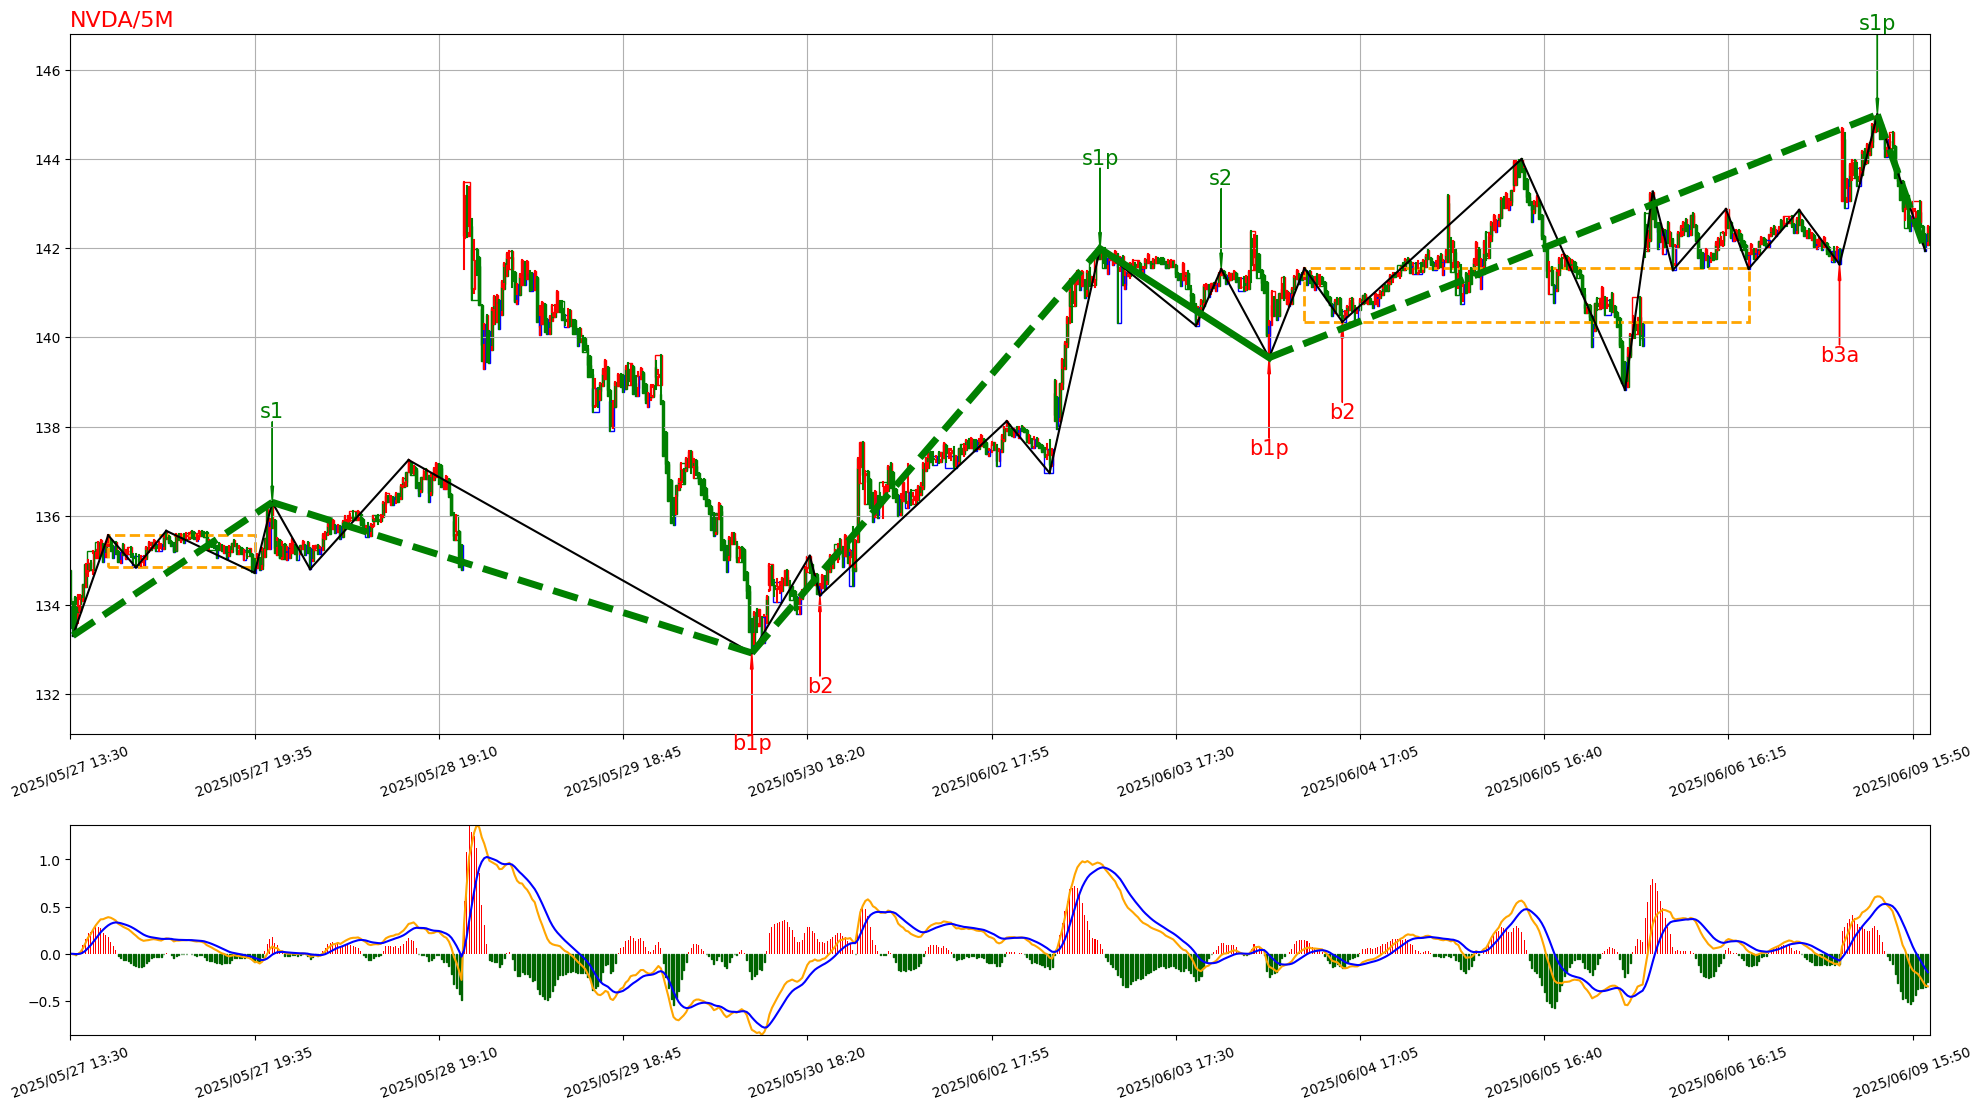

In [4]:
chan = CChan(
    code=code,
    begin_time=begin_time,
    end_time=end_time,
    data_src=data_src,
    lv_list=lv_list,
    config=config,
    autype=AUTYPE.QFQ,
)

plot_driver = CPlotDriver(chan, plot_config=plot_config, plot_para=plot_para)
plot_driver.save2img("./NVDA5m.png")
plot_driver.figure.show()

In [ ]:
from utils.export_bs_features import export_bs_feature_file
export_bs_feature_file(chan, KL_TYPE.K_5M, "./output/bs_features_NVDA_5m.csv", window=5)


Exporting BS features for level KL_TYPE.K_5M to: ./output/bs_features_NVDA_5m.csv


ValueError: dict contains fields not in fieldnames: 'bsp1_bi_amp'